In [1]:
from pyautoml import Clean, Preprocess, Feature
import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

## Cleaning

In [3]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,574,712,712,NaN,712,NaN,NaN
mean,453.322,0.376404,2.29213,NaN,NaN,30.053,0.549157,0.398876,NaN,32.2128,NaN,NaN
std,255.889,0.484824,0.84297,NaN,NaN,14.8994,1.15121,0.820551,NaN,45.8411,NaN,NaN
min,1,0,1,NaN,NaN,0.67,0,0,NaN,0,NaN,NaN
25%,232.75,0,1,NaN,NaN,20.125,0,0,NaN,7.925,NaN,NaN
50%,459.5,0,3,NaN,NaN,28,0,0,NaN,14.5,NaN,NaN
75%,674.25,1,3,NaN,NaN,39,1,0.25,NaN,31.275,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,574,712,712,712,712,169,710
uniques,712,2,3,712,2,86,7,7,562,225,132,3


In [4]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,574,712,712,712,712,169,710
uniques,712,2,3,712,2,86,7,7,562,225,132,3
missing,0,0,0,0,0,138,0,0,0,0,543,2
missing_perc,0%,0%,0%,0%,0%,19.38%,0%,0%,0%,0%,76.26%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


In [5]:
clean.describe_column('Fare')

mean                        32.2128
std                         45.8411
variance                    2101.41
min                               0
max                         512.329
mode                         7.8958
5%                            7.125
25%                           7.925
50%                            14.5
75%                          31.275
95%                         113.275
iqr                           23.35
kurtosis                    24.1135
skewness                    3.98176
sum                         22935.5
mad                         27.7829
cv                          1.42307
zeros_num                        13
zeros_perc                    1.83%
deviating_of_mean                15
deviating_of_mean_perc        2.11%
deviating_of_median              44
deviating_of_median_perc      6.18%
top_correlations                   
counts                          712
uniques                         225
missing                           0
missing_perc                

In [6]:
clean.describe_column('Fare')['mean']

32.21283244382023

In [7]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,543.00000,138.00000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.76264,0.19382,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,144.000000,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.804469,0.217877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [9]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,B35,69.3,C
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,NaN,30.0708,C
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,B30,61.9792,C
3,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,NaN,56.4958,S
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,NaN,7.75,Q
5,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,NaN,15.2458,C
6,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,NaN,8.05,S
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,NaN,33,S
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,C82,211.5,C
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,NaN,6.45,S


In [10]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,543.00000,138.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.76264,0.19382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,144.000000,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.804469,0.217877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


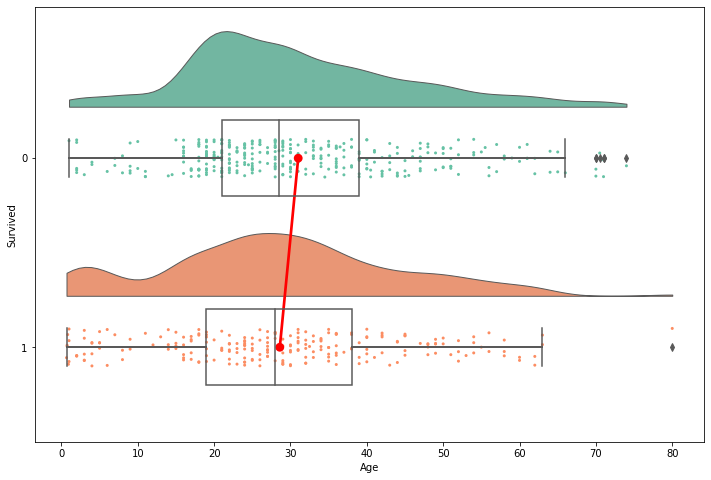

In [11]:
clean.visualize_raincloud('Age')

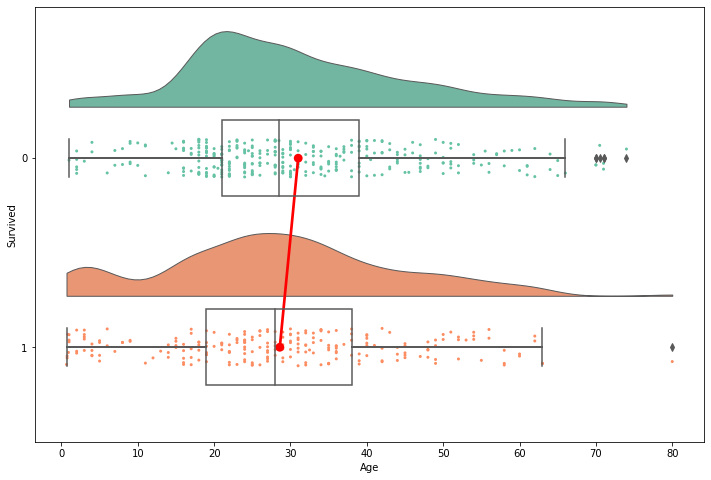

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,543.00000,138.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.76264,0.19382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,144.000000,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.804469,0.217877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,B35,69.3,C
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,NaN,30.0708,C
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,B30,61.9792,C
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,NaN,56.4958,S
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,NaN,7.75,Q
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,NaN,15.2458,C
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,NaN,8.05,S
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,NaN,33,S
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,C82,211.5,C
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,NaN,6.45,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,543.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.76264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,144.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.804469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,543.00000,138.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.76264,0.19382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,144.000000,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.804469,0.217877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean')

In [19]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,543.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.76264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,144.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.804469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,56.4958,S
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,Q
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,C
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,8.05,S
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33,S
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,S


## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(data_properties=clean.data_properties)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C,Mrs
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Mr
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,56.4958,S,Mr
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,Q,Miss
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,C,Master
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,8.05,S,Mr
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33,S,Officer
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C,Mr
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,S,Mr


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C,Mrs,0
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Mr,1
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,56.4958,S,Mr,0
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,Q,Miss,0
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,C,Master,2
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,8.05,S,Mr,0
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33,S,Officer,1
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C,Mr,2
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,S,Mr,0


In [25]:
def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C,Mrs,0,female
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1,child
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Mr,1,male
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,56.4958,S,Mr,0,male
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,Q,Miss,0,female
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,C,Master,2,male
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,8.05,S,Mr,0,male
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33,S,Officer,1,male
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C,Mr,2,male
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,S,Mr,0,male


In [26]:
feature_copy = feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')
feature_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C,Mrs,0,female
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1,child
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Mr,1,male
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,56.4958,S,Mr,0,male
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,Q,Miss,0,female
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,C,Master,2,male
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,8.05,S,Mr,0,male
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33,S,Officer,1,male
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C,Mr,2,male
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,S,Mr,0,male


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex')

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,370,1,1,24.0,69.3,C,Mrs,0,female
1,10,1,2,14.0,30.0708,C,Mrs,1,child
2,55,0,1,65.0,61.9792,C,Mr,1,male
3,827,0,3,27.0,56.4958,S,Mr,0,male
4,209,1,3,16.0,7.75,Q,Miss,0,female
5,66,1,3,28.0,15.2458,C,Master,2,male
6,455,0,3,21.0,8.05,S,Mr,0,male
7,849,0,2,28.0,33,S,Officer,1,male
8,378,0,1,27.0,211.5,C,Mr,2,male
9,819,0,3,43.0,6.45,S,Mr,0,male


In [28]:
feature_copy2 = feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass')
feature_copy2

,PassengerId,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,370,1,24.0,69.3,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,10,1,14.0,30.0708,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55,0,65.0,61.9792,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,827,0,27.0,56.4958,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,209,1,16.0,7.75,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,66,1,28.0,15.2458,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,455,0,21.0,8.05,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,849,0,28.0,33,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,378,0,27.0,211.5,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,819,0,43.0,6.45,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
feature_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,C,Mrs,0,female
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1,child
2,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Mr,1,male
3,827,0,3,"Lam, Mr. Len",male,27.0,0,0,1601,56.4958,S,Mr,0,male
4,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,Q,Miss,0,female
5,66,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,C,Master,2,male
6,455,0,3,"Peduzzi, Mr. Joseph",male,21.0,0,0,A/5 2817,8.05,S,Mr,0,male
7,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33,S,Officer,1,male
8,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C,Mr,2,male
9,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,S,Mr,0,male


## Modelling

ValueError: Length mismatch: Expected axis has 17 elements, new values have 19 elements